In [1]:
from utils import *
import pandas as pd
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
plt.style.use('seaborn-muted')
plt.rc('font', size=16, family='serif')
plt.rc('mathtext', default='it', fontset='cm')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
depths=(2,3,10)
arrays = [
    ['Parametric'], 
    #'Ackley', 'Franke', 'Nonpoly', 'Friedman 1', 'Friedman 2', 'Friedman 3'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Dataset", "Noise"])


df_gaus_rd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_gaus_sd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_lap_rd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

df_lap_sd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}rmse', f'D{depths[1]}rmse',  f'D{depths[2]}rmse', f'D{depths[0]}corr', f'D{depths[1]}corr', f'D{depths[2]}corr'])

# Datasets

In [3]:
datasets = []
# [X_train, y_train, X_test, y_test, norm, noise, name]

## Parametric

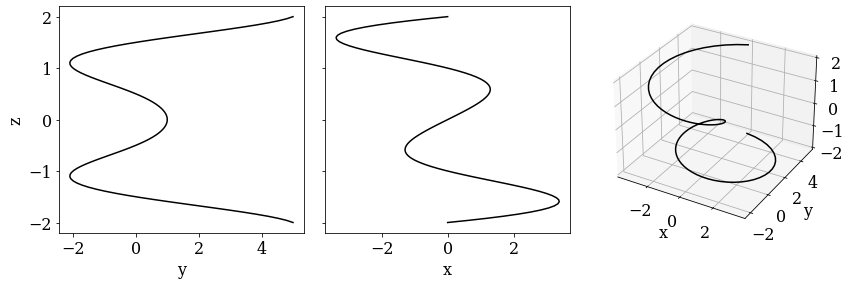

In [16]:
name = 'Parametric'
np.random.seed(12435908)
noise = 0.15

linear = np.linspace(0, 99, 100, dtype=int)
train_index = np.sort(np.random.choice(linear, 50, replace=False))
test_index = np.delete(linear, train_index)

z = np.linspace(-2, 2, 100)
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = (z**2 + 1) * np.sin(t)
y = (z**2 + 1) * np.cos(t)

X, y, y_noisy = np.column_stack((x,y)), z.reshape(-1,1), np.random.normal(z, scale=noise).reshape(-1,1)

X_train, y_train, y_train_noisy = X[train_index], y[train_index], y_noisy[train_index]
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = X[test_index], y[test_index], y_noisy[test_index]
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,4.25), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X[:,0], X[:,1], y.ravel(), c='black')
# ax[2].scatter(X[:,0], X[:,1], y_noisy, c=y_noisy, cmap='plasma', alpha=.9)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

ax[1].plot(X[:,0], y.ravel(), c='black', zorder=0)
# ax[1].scatter(X[:,0], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[1].set_xlabel('x')
# ax[1].set_ylabel('z')

ax[0].plot(X[:,1], y.ravel(), c='black', zorder=0)
# ax[0].scatter(X[:,1], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[0].set_xlabel('y')
ax[0].set_ylabel('z')
fig.tight_layout()

In [8]:
fig.savefig('./exp/synth_2D/parametric/dataset.svg')

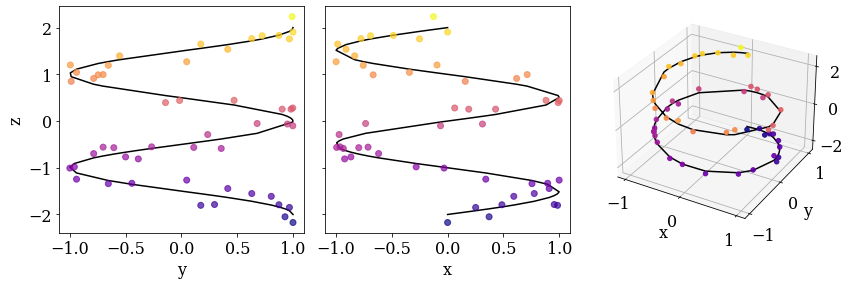

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,4.25), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X_norm_train[:,0], X_norm_train[:,1], y_train.ravel(), c='black')
ax[2].scatter(X_norm_train[:,0], X_norm_train[:,1], y_train_noisy, c=y_train_noisy, cmap='plasma', alpha=.9)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

ax[1].plot(X_norm_train[:,0], y_train.ravel(), c='black', zorder=0)
ax[1].scatter(X_norm_train[:,0], y_train_noisy, c=y_train_noisy, alpha=.7, cmap='plasma')
ax[1].set_xlabel('x')
# ax[1].set_ylabel('z')

ax[0].plot(X_norm_train[:,1], y_train.ravel(), c='black', zorder=0)
ax[0].scatter(X_norm_train[:,1], y_train_noisy, c=y_train_noisy, alpha=.7, cmap='plasma')
ax[0].set_xlabel('y')
ax[0].set_ylabel('z')
fig.tight_layout()

In [10]:
fig.savefig('./exp/synth_2D/parametric/dataset_norm.svg')

## Ackley

In [4]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [5]:
arrsize = 20

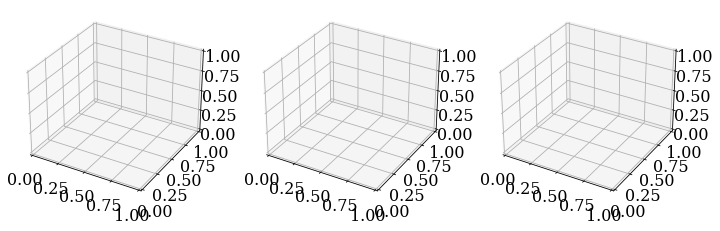

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

In [7]:
name = 'Ackley'
noise = 0.75

tmp1 = sample(1,7, arrsize)
tmp2 = sample(1,7, arrsize)
tmp3 = sample(1,7, arrsize)
tmp4 = sample(1,7, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)    
Z1 = -20*np.exp(-0.2 * np.sqrt(0.5*(X1**2 + Y1**2))) - np.exp(0.5 *(np.cos(2*np.pi*X1) + np.cos(2*np.pi*Y1))) + np.e + 20
X2, Y2 = np.meshgrid(tmp3, tmp4)    
Z2 = -20*np.exp(-0.2 * np.sqrt(0.5*(X2**2 + Y2**2))) - np.exp(0.5 *(np.cos(2*np.pi*X2) + np.cos(2*np.pi*Y2))) + np.e + 20

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
# datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
# datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
# datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

ax[0].contourf(X1,Y1,Z1, levels=100)
ax[0].set_title(name)

Text(0.5, 0.92, 'Ackley')

## Franke

In [8]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [9]:
name = 'Franke'
noise = 0.1

tmp1 = sample(-0.5,1, arrsize)
tmp2 = sample(-0.5,1, arrsize)
tmp3 = sample(-0.5,1, arrsize)
tmp4 = sample(-0.5,1, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)     
Z1 = (0.75*np.exp(- (9*X1 - 2)**2/4 - (9*Y1 - 2)**2/4) + 
        0.75*np.exp(- (9*X1 + 1)**2/49 - (9*Y1 + 1)/10) +
        0.5*np.exp(- (9*X1 - 7)**2/4  - (9*Y1 - 3)**2/4) +
        0.2*np.exp(- (9*X1 - 4)**2    - (9*Y1 - 7)**2))
X2, Y2 = np.meshgrid(tmp3, tmp4)     
Z2 = (0.75*np.exp(- (9*X2 - 2)**2/4 - (9*Y2 - 2)**2/4) + 
        0.75*np.exp(- (9*X2 + 1)**2/49 - (9*Y2 + 1)/10) +
        0.5*np.exp(- (9*X2 - 7)**2/4  - (9*Y2 - 3)**2/4) +
        0.2*np.exp(- (9*X2 - 4)**2    - (9*Y2 - 7)**2))

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
# datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
# datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
# datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

ax[1].plot_surface(X1,Y1,Z1, rcount=200, ccount=200, cmap='viridis')#, levels=100, linewidths=20)
ax[1].set_title(name)

Text(0.5, 0.92, 'Franke')

## Nonpolynomial

In [10]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [11]:
name = 'Nonpolynomial'
noise = 1

tmp1 = sample(0,2, arrsize)
tmp2 = sample(0,2, arrsize)
tmp3 = sample(0,2, arrsize)
tmp4 = sample(0,2, arrsize)
X1, Y1 = np.meshgrid(tmp1, tmp2)   
Z1 = 1/6 * ((30+5*X1*np.sin(5*X1))*(4+np.exp(-5*Y1)) - 100)
X2, Y2 = np.meshgrid(tmp3, tmp4)   
Z2 = 1/6 * ((30+5*X2*np.sin(5*X2))*(4+np.exp(-5*Y2)) - 100)

bigX1 = np.stack((X1,Y1), axis=2).reshape(-1,2)
smolY1 = Z1.reshape(-1,1)
bigX2 = np.stack((X2,Y2), axis=2).reshape(-1,2)
smolY2 = Z2.reshape(-1,1)

X_train, y_train, y_train_noisy = bigX1, smolY1, np.random.normal(smolY1, scale=noise).reshape(-1,1)
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = bigX2, smolY2, np.random.normal(smolY2, scale=noise).reshape(-1,1)
X_norm_test = normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
# datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
# datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
# datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])
ax[2].contourf(X1,Y1,Z1, levels=100)
ax[2].set_title(name)

Text(0.5, 0.92, 'Nonpolynomial')

In [15]:
np.corrcoef((y_test).ravel(), (y_test_noisy).ravel())[0,1]

0.9415871202569335

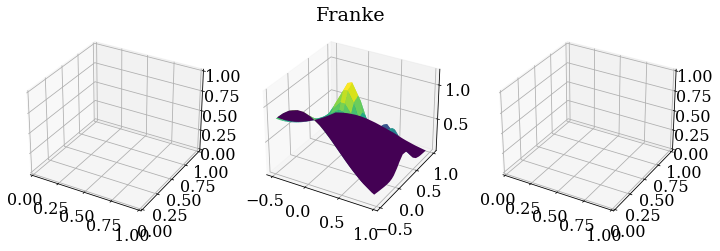

In [62]:
fig

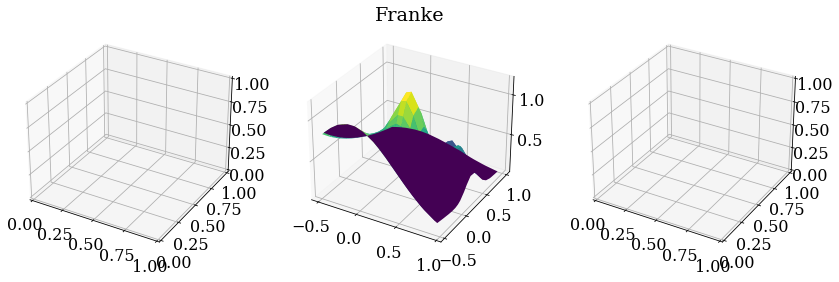

In [63]:
fig.tight_layout()
fig.savefig('./exp/synth_2D/2D.svg')
# fig.savefig('./exp/synth_2D/2D.png', dpi=150, transparent=False, bbox_inches='tight')
fig

## Friedman 1

In [16]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [17]:
name = 'Friedman 1'
noise = 1.5

X_train, y_train = make_friedman1(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman1(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman1(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman1(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 2

In [18]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [19]:
name = 'Friedman 2'
noise = 5

X_train, y_train = make_friedman2(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman2(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman2(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman2(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

## Friedman 3

In [20]:
X_train = None
X_norm_train = None
y_train = None
y_train_noisy = None
X_test = None
X_norm_test = None
y_test = None 
y_test_noisy = None

In [21]:
name = 'Friedman 3'
noise = 0.15

X_train, y_train = make_friedman3(noise=0.0, random_state=18397425)
_, y_train_noisy = make_friedman3(noise=noise, random_state=18397425)
X_norm_train= normalize(X_train, axis=1)

X_test, y_test = make_friedman3(noise=0.0, random_state=30189745)
_, y_test_noisy = make_friedman3(noise=noise, random_state=30189745)
X_norm_test= normalize(X_test, axis=1)

# [X_train, y_train, X_test, y_test, X_draw, norm, noise, name]
datasets.append([X_train, y_train, X_test, y_test, X_test, False, 0.0, name])
datasets.append([X_norm_train, y_train, X_norm_test, y_test, X_test, True, 0.0, name])
datasets.append([X_train, y_train_noisy, X_test, y_test_noisy, X_test, False, 0.15, name])
datasets.append([X_norm_train, y_train_noisy, X_norm_test, y_test_noisy, X_test, True, 0.15, name])

# Results

In [12]:
experiment_outputs = []
for data in datasets:
    for depth in (2, 3, 10):
        experiment_outputs.append(experiment(data, depth, search_bound=10, norm_y=True))


Ackley :
norm  = True
noise = 0.0
depth = 2
77.1**2 * NTK(depth=2, c=2.000, bias=42462.528)
77.1**2 * Matern(length_scale=2.97, nu=0.5)
77.1**2 * Matern(length_scale=0.000123, nu=inf)

Ackley :
norm  = True
noise = 0.0
depth = 3
62.9**2 * NTK(depth=3, c=2.000, bias=959.244)
62.9**2 * Matern(length_scale=1.85, nu=0.5)
62.9**2 * Matern(length_scale=0.000123, nu=inf)

Ackley :
norm  = True
noise = 0.0
depth = 10
34.5**2 * NTK(depth=10, c=2.000, bias=26100.345)
34.5**2 * Matern(length_scale=0.43, nu=0.5)
34.5**2 * Matern(length_scale=0.000123, nu=inf)

Franke :
norm  = True
noise = 0.0
depth = 2


KeyboardInterrupt: 

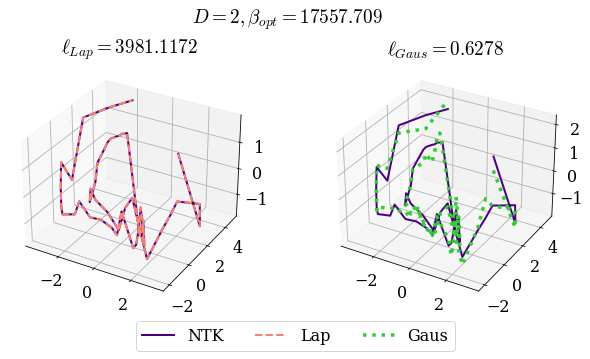

In [12]:
exp = experiment_outputs[0]
means = exp['means']
# means1 = experiment_outputs[0]['means']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(9,5), subplot_kw={'projection': '3d'})
ax = ax.ravel()
fig.suptitle(rf"$D={exp['kernel']['depth']}, " + r'\beta_{opt}' + f"={round(exp['kernel']['bias'], 4)}$")
ax[0].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo', label='NTK')
ax[0].plot(X_test[:,0], X_test[:,1], means[0], '--', lw=2, color='salmon', label='Lap')
ax[0].set_title(r"$\ell_{Lap}=" + f"{round(exp['kernel']['ell_lap'], 4)}$")
ax[1].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo')
ax[1].plot(X_test[:,0], X_test[:,1], means[2], ':', lw=3.5, color='limegreen', label='Gaus')
ax[1].set_title(r"$\ell_{Gaus}=" + f"{round(exp['kernel']['ell_gaus'], 4)}$")

fig.legend(loc='lower center', ncol=3)
fig.tight_layout(rect=[0, 0.1, 1, 1])
# fig.savefig('./exp/synth_2D/parametric/D2norm.svg')
# ax[0].scatter(X_test[:,0], X_test[:,1], y_test.ravel())
# ax[1].scatter(X_test[:,0], X_test[:,1], y_test.ravel())

# angle = 180
# ax[0].view_init(30, angle)
# ax[1].view_init(30, angle)
# plt.draw()


In [27]:
np.corrcoef(means[0], means[2])

array([[1.        , 0.94617714],
       [0.94617714, 1.        ]])

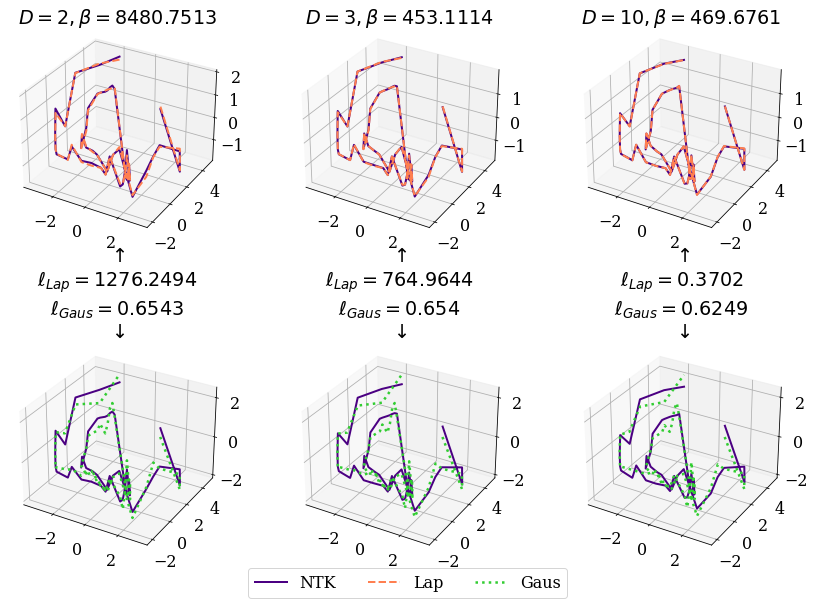

In [36]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,8.5), subplot_kw={'projection': '3d'})
ax = ax.ravel()

i=0
for exp in experiment_outputs:
    means = exp['means']

    ax[i].set_title(rf"$D={exp['kernel']['depth']}, " + r'\beta' + f"={round(exp['kernel']['bias'], 4)}$",
        y=1.05)
    ax[i].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo', label='NTK')
    ax[i].plot(X_test[:,0], X_test[:,1], means[1], '--', lw=2, color='coral', label='Lap')
    ax[i + 3].set_title(
        r"$\uparrow$" + "\n"
        r"$\ell_{Lap}=" + f"{round(exp['kernel']['ell_lap'], 4)}$" + "\n" 
        r"$\ell_{Gaus}=" + f"{round(exp['kernel']['ell_gaus'], 4)}$" + "\n"
        r"$\downarrow$", 
        y=1.05,
        pad=10
    )
    ax[i + 3].plot(X_test[:,0], X_test[:,1], means[0], lw=2, color='indigo')
    ax[i + 3].plot(X_test[:,0], X_test[:,1], means[2], ':', lw=2.5, color='limegreen', label='Gaus')
    i += 1
top = ax[0].get_legend_handles_labels() 
bot = ax[3].get_legend_handles_labels()
handles = top[0] + bot[0]
labels = top[1] + bot[1]
fig.legend(handles, labels, loc='lower center', ncol=3)#, bbox_to_anchor=[0.5])
fig.tight_layout(rect=[0, 0.05, 1, 1])
# fig.savefig('./exp/synth_2D/parametric/X_norm.svg')

In [49]:
import os
os.getcwd() + '/synth.dat'

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/rlencevicius1/code/thesis/synth.dat'

In [52]:
test = load_data('./synth')

In [64]:
for exp in experiment_outputs:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if name == 'Nonpolynomial':
        name = 'Nonpoly'

    if exp['dataset']['norm']:
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

In [70]:
print(df_lap_sd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Parametric} & 0 & 0.085998 & 0.024957 & 0.007893 & 0.997422 & 0.999774 & 0.999975 \\
 & 1 & 0.056334 & 0.031416 & 0.049380 & 0.995403 & 0.998362 & 0.992870 \\
\end{tabular}



In [71]:
print(df_gaus_sd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Parametric} & 0 & 0.335151 & 0.360989 & 0.366979 & 0.958960 & 0.950930 & 0.946177 \\
 & 1 & 0.022766 & 0.041220 & 0.091515 & 0.999122 & 0.997988 & 0.978311 \\
\end{tabular}



In [72]:
print(df_lap_rd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Parametric} & 0 & 0.290360 & 0.284153 & 0.367052 & 0.948897 & 0.945175 & 0.854318 \\
 & 1 & 0.440731 & 0.425926 & 0.343554 & 0.966706 & 0.961488 & 0.931745 \\
\end{tabular}



In [73]:
print(df_gaus_rd.style.to_latex())

\begin{tabular}{llllllll}
 &  & D2rmse & D3rmse & D10rmse & D2corr & D3corr & D10corr \\
Dataset & Noise &  &  &  &  &  &  \\
\multirow[c]{2}{*}{Parametric} & 0 & 0.271647 & 0.273159 & 0.363070 & 0.956562 & 0.952061 & 0.882128 \\
 & 1 & 0.368274 & 0.354795 & 0.277732 & 0.978159 & 0.974037 & 0.955455 \\
\end{tabular}



In [42]:
save_data(experiment_outputs, './synth')